# 1. Importar bibliotecas necesarias

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns

# 2. Cargar el conjunto de datos Titanic

In [6]:
url = 'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv'
titanic_data = pd.read_csv(url)

# 3. Preprocesamiento de datos

In [8]:
# Seleccionar características relevantes
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']
X = titanic_data[features].copy()  # Hacemos una copia del DataFrame

# Convertir la variable 'Sex' en numérica
X.loc[:, 'Sex'] = X['Sex'].map({'male': 0, 'female': 1})

# Lidiar con valores faltantes en 'Age' y 'Fare'
X.loc[:, 'Age'] = X['Age'].fillna(X['Age'].median())
X.loc[:, 'Fare'] = X['Fare'].fillna(X['Fare'].median())

# Variable objetivo
y = titanic_data['Survived']

# 4. Dividir el conjunto de datos en conjuntos de entrenamiento y prueba

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 5. Crear un árbol de decisión

In [10]:
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

# 6. Realizar predicciones

In [11]:
y_pred = clf.predict(X_test)

# 7. Evaluar el modelo

In [12]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Precisión del modelo: {accuracy:.2f}")

Precisión del modelo: 0.76


# 8. Imprimir el informe de clasificación

In [13]:
print("\nInforme de clasificación:\n", classification_report(y_test, y_pred))



Informe de clasificación:
               precision    recall  f1-score   support

           0       0.78      0.82      0.80       157
           1       0.73      0.68      0.70       111

    accuracy                           0.76       268
   macro avg       0.75      0.75      0.75       268
weighted avg       0.76      0.76      0.76       268



# 9. Matriz de confusión


In [14]:
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nMatriz de confusión:\n", conf_matrix)


Matriz de confusión:
 [[129  28]
 [ 36  75]]


# 10. Visualizar el árbol de decisión


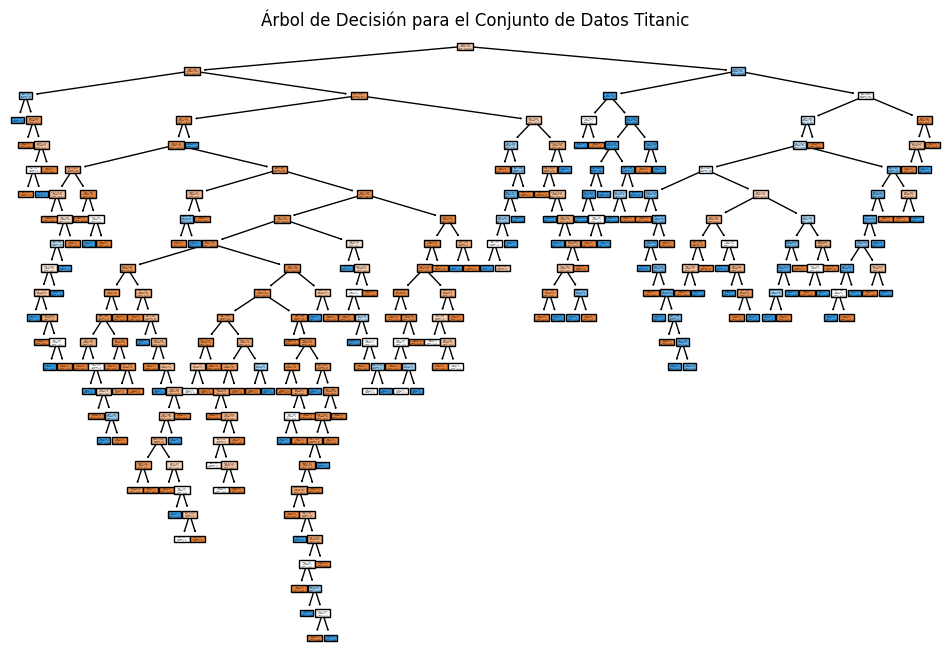

In [15]:
plt.figure(figsize=(12,8))
tree.plot_tree(clf, feature_names=features, class_names=['No Survived', 'Survived'], filled=True)
plt.title("Árbol de Decisión para el Conjunto de Datos Titanic")
plt.show()

# 11. Análisis de importancia de características


In [16]:
importances = clf.feature_importances_
indices = np.argsort(importances)[::-1]


# 12. Visualizar la importancia de las características

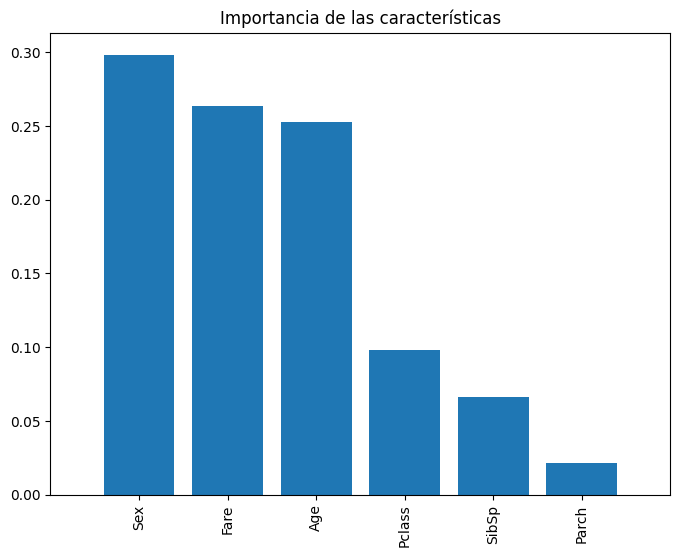

In [17]:
plt.figure(figsize=(8,6))
plt.title("Importancia de las características")
plt.bar(range(X.shape[1]), importances[indices], align='center')
plt.xticks(range(X.shape[1]), np.array(features)[indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()

# 13. Visualizar la matriz de confusión

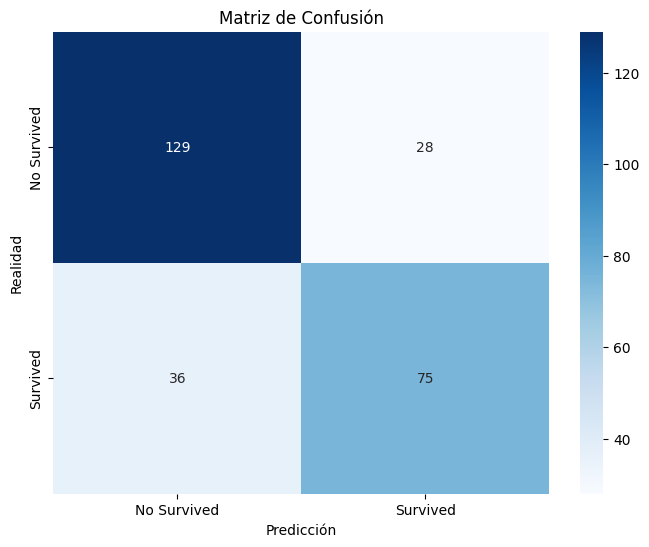

In [18]:
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Survived', 'Survived'], yticklabels=['No Survived', 'Survived'])
plt.title('Matriz de Confusión')
plt.xlabel('Predicción')
plt.ylabel('Realidad')
plt.show()